In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

In [ ]:
# Load the dataset
df = pd.read_csv('/content/ETH-USD.csv')

In [ ]:
df['Close'] = pd.to_numeric(df['Close'])
df['Open'] = pd.to_numeric(df['Open'])
df['High'] = pd.to_numeric(df['High'])
df['Low'] = pd.to_numeric(df['Low'])

In [ ]:
df['Date-Time'] = df['Date'].apply(pd.to_datetime)
df.set_index('Date-Time')

,Date,Open,High,Low,Close,Adj Close,Volume
Date-Time,,,,,,,
2017-12-01,2017-12-01,445.209015,472.609009,428.312012,466.540009,466.540009,1247879936
2017-12-02,2017-12-02,466.851013,476.239014,456.653015,463.449005,463.449005,943649984
2017-12-03,2017-12-03,463.704987,482.813995,451.851990,465.852997,465.852997,990556992
2017-12-04,2017-12-04,466.053986,474.777008,453.312012,470.204010,470.204010,1005550016
2017-12-05,2017-12-05,470.294006,473.558014,457.660004,463.281006,463.281006,1216720000
...,...,...,...,...,...,...,...
2023-06-06,2023-06-06,1810.581421,1896.222656,1801.405273,1884.494873,1884.494873,8704411776
2023-06-07,2023-06-07,1884.372925,1893.809082,1822.303101,1832.395996,1832.395996,7919894455
2023-06-08,2023-06-08,1832.513550,1861.136108,1830.165039,1846.301880,1846.301880,4536041931


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df['Close'] = scaler.fit_transform(df['Close'].values.astype(float).reshape(-1,1))

x=df['Close'].values.astype(float)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Date-Time
0,2017-12-01,445.209015,472.609009,428.312012,0.080848,466.540009,1247879936,2017-12-01
1,2017-12-02,466.851013,476.239014,456.653015,0.080194,463.449005,943649984,2017-12-02
2,2017-12-03,463.704987,482.813995,451.851990,0.080703,465.852997,990556992,2017-12-03
3,2017-12-04,466.053986,474.777008,453.312012,0.081623,470.204010,1005550016,2017-12-04
4,2017-12-05,470.294006,473.558014,457.660004,0.080159,463.281006,1216720000,2017-12-05


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2.018000e+03
mean,1184.343445,1220.583056,1143.604716,0.232766,1184.774227,1.263980e+10
std,1155.875062,1190.421444,1116.235180,0.244381,1155.380384,1.045635e+10
min,84.279694,85.342743,82.829887,0.000000,84.308296,9.436500e+08
25%,219.620254,224.671921,212.718059,0.028621,219.620899,5.090199e+09
50%,673.088501,696.081513,634.948028,0.124779,674.236480,1.009673e+10
75%,1817.716522,1847.889374,1774.703095,0.366592,1817.475250,1.752738e+10
max,4810.071289,4891.704590,4718.039063,1.000000,4812.087402,8.448291e+10


In [ ]:
# Define the lengths of train, validation, and test sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

# Split the dataset into train, validation, and test sets
train_data = x[:train_size]
test_data = x[train_size:train_size + test_size]
val_data = x[train_size + test_size:]

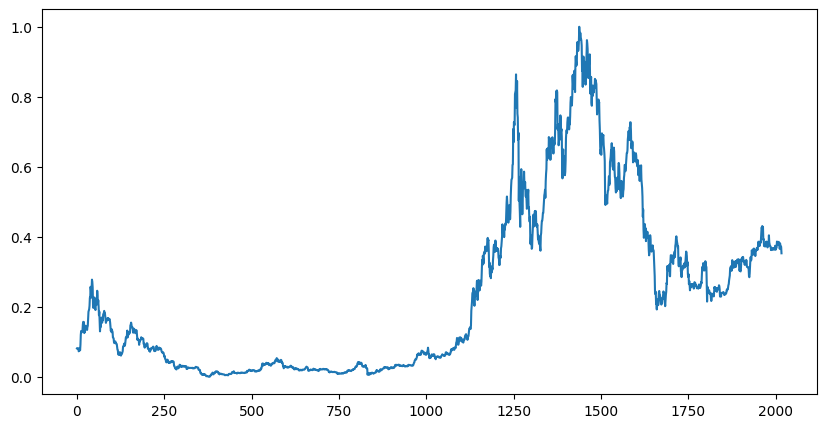

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x)
plt.show()

In [ ]:
def create_dataset(input_data, time_step):
    X = []
    y = []
    for n,i in enumerate(input_data):
        if (n + time_step >= len(input_data)):
            break
        else:
            y.append(input_data[n+time_step-1])
            for temp in range(time_step):
                X.append(input_data[n+time_step-1])
    return np.array(X).astype(float), np.array(y).astype(float)

In [ ]:
time_step = 3 # dùg 3 ngày gần nhất để dự đoán
X_stack, y_stack = create_dataset(x,time_step) # dữ liệu đầu vào chia theo độ dài time_step
X_stack = X_stack.reshape(-1,time_step,1)
y_stack = y_stack.reshape(-1,1)
X_train_stack = X_stack[:train_size-time_step,:,:]
X_test_stack = X_stack[train_size-time_step:train_size+test_size-time_step,:,:]
X_val_stack = X_stack[train_size+test_size-time_step:,:,:]
y_train_stack = y_stack[:train_size-time_step,:]
y_test_stack = y_stack[train_size-time_step:train_size+test_size-time_step,:]
y_val_stack = y_stack[train_size+test_size-time_step:,:]

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
model.fit(X_train_stack.reshape(-1,time_step), y_train_stack.reshape(y_train_stack.shape[0],))

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
# dự báo train, test, val
train_preds = model.predict(X_train_stack.reshape(-1,time_step,))
test_preds = model.predict(X_test_stack.reshape(-1,time_step,))
val_preds = model.predict(X_val_stack.reshape(-1,time_step,))
temp_input = X_val_stack[-time_step:,-1,0].astype(float)

In [ ]:
# dự báo 30 ngày
n_forecast = 30
future_preds = []
for i in range(n_forecast):
    pred_val = model.predict(temp_input[-time_step:].reshape(-1,time_step,))
    future_preds.append(pred_val[0])
    temp_input = np.append(temp_input,pred_val)
future_preds = np.array(future_preds)

In [ ]:
mae = mean_absolute_error(test_preds, test_data)
mape = mean_absolute_percentage_error(test_preds, test_data)
mse = mean_squared_error(test_preds, test_data)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MAPE:", mape * 100)
print("RMSE:", rmse)

MAE: 0.011963958006593592
MAPE: 3.8367086653105877
RMSE: 0.017103515344216873


In [ ]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
test_out_index = pd.RangeIndex(start=train_size, stop = train_size+test_size)

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size + len(val_data), step=1)
val_out_index = pd.RangeIndex(start=train_size+test_size,stop=len(df))

predict_data_index = pd.RangeIndex(start=len(df), stop=len(df)+n_forecast, step=1)

In [ ]:
train_preds = scaler.inverse_transform(train_preds.reshape(-1,1))
test_preds = scaler.inverse_transform(test_preds.reshape(-1,1))
val_preds = scaler.inverse_transform(val_preds.reshape(-1,1))
future_preds = scaler.inverse_transform(future_preds.reshape(-1,1))

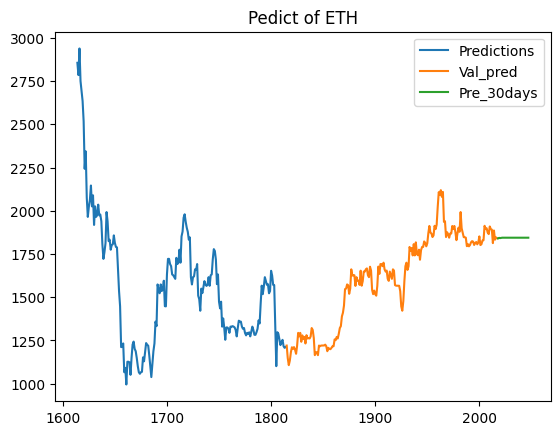

In [ ]:
# plt.plot(train_data_index, train_data.astype(float))
#plt.plot(test_data_index, test_data.astype(float))
plt.plot(test_out_index,test_preds)
plt.plot(val_out_index,val_preds)
plt.plot(predict_data_index,future_preds)
plt.legend(['Predictions','Val_pred','Pre_30days'])
plt.title('Pedict of ETH')
plt.show()